Epoch    1/1000 | Loss: 1.0793 | Accuracy: 33.33%
Epoch  100/1000 | Loss: 0.3138 | Accuracy: 100.00%
Epoch  200/1000 | Loss: 0.0966 | Accuracy: 100.00%
Epoch  300/1000 | Loss: 0.0506 | Accuracy: 100.00%
Epoch  400/1000 | Loss: 0.0332 | Accuracy: 100.00%
Epoch  500/1000 | Loss: 0.0244 | Accuracy: 100.00%
Epoch  600/1000 | Loss: 0.0192 | Accuracy: 100.00%
Epoch  700/1000 | Loss: 0.0158 | Accuracy: 100.00%
Epoch  800/1000 | Loss: 0.0133 | Accuracy: 100.00%
Epoch  900/1000 | Loss: 0.0115 | Accuracy: 100.00%
Epoch 1000/1000 | Loss: 0.0102 | Accuracy: 100.00%


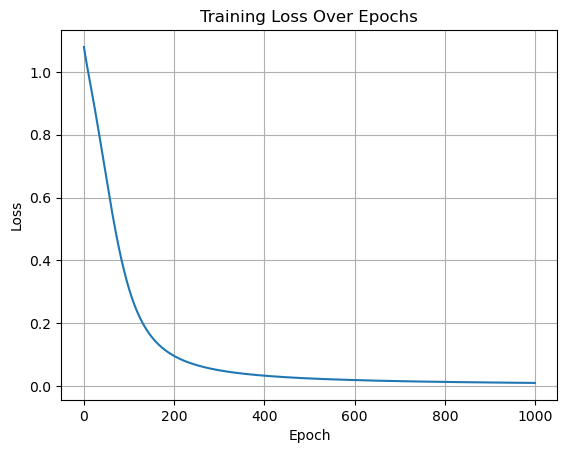

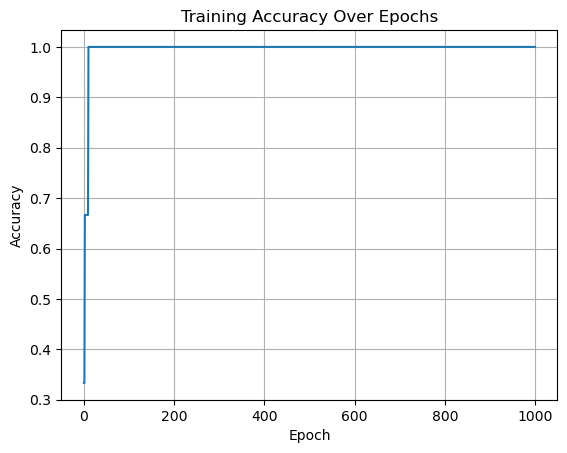

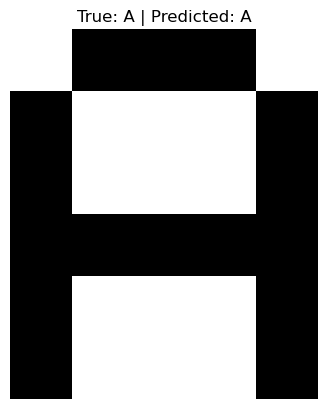

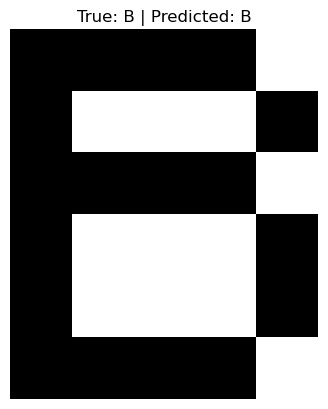

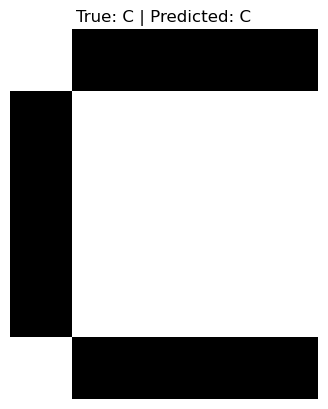

In [1]:

import numpy as np
import matplotlib.pyplot as plt


patterns = {
    "A": np.array([
        [0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
    ], dtype=float),

    "B": np.array([
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
    ], dtype=float),

    "C": np.array([
        [0, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1],
    ], dtype=float),
}

X_data, Y_labels = [], []
for idx, (char, matrix) in enumerate(patterns.items()):
    X_data.append(matrix.flatten())
    label = np.zeros(3)
    label[idx] = 1
    Y_labels.append(label)

X = np.stack(X_data).T
Y = np.stack(Y_labels).T

input_neurons = 30
hidden_neurons = 10
output_neurons = 3
learning_rate = 0.1
total_epochs = 1000

generator = np.random.default_rng(42)
W1 = generator.normal(0, 1/np.sqrt(input_neurons), (hidden_neurons, input_neurons))
b1 = np.zeros((hidden_neurons, 1))
W2 = generator.normal(0, 1/np.sqrt(hidden_neurons), (output_neurons, hidden_neurons))
b2 = np.zeros((output_neurons, 1))

sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: x * (1 - x)

def softmax(z):
    exps = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

def compute_loss(predictions, targets):
    m = targets.shape[1]
    return -np.sum(targets * np.log(predictions + 1e-9)) / m

loss_vals, accuracy_vals = [], []

for epoch in range(1, total_epochs + 1):
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = softmax(z2)

    loss = compute_loss(a2, Y)
    predictions = np.argmax(a2, axis=0)
    true_labels = np.argmax(Y, axis=0)
    accuracy = np.mean(predictions == true_labels)

    loss_vals.append(loss)
    accuracy_vals.append(accuracy)

    m = X.shape[1]
    dz2 = (a2 - Y) / m
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1, keepdims=True)

    da1 = W2.T @ dz2
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch == 1 or epoch % 100 == 0 or epoch == total_epochs:
        print(f"Epoch {epoch:4d}/{total_epochs} | Loss: {loss:.4f} | Accuracy: {accuracy*100:.2f}%")

plt.plot(loss_vals)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.plot(accuracy_vals)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

def classify(input_image):
    x = input_image.flatten().reshape(-1, 1)
    hidden = sigmoid(W1 @ x + b1)
    output = softmax(W2 @ hidden + b2)
    return ["A", "B", "C"][np.argmax(output)]

for letter, matrix in patterns.items():
    predicted = classify(matrix)
    plt.imshow(matrix, cmap="Greys")
    plt.title(f"True: {letter} | Predicted: {predicted}")
    plt.axis("off")
    plt.show()
